In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def generate_time_series(n_periods=100,
                         frequency='days',
                         trend_slope=0.3,
                         seasonal_period='monthly',
                         seasonal_amplitude=5,
                         noise_level=0.5):
    # Set frequency based on the input (days, months, or weeks)
    if frequency == 'days':
        freq = 'D'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    elif frequency == 'months':
        freq = 'ME'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    elif frequency == 'weeks':
        freq = 'W'
        time_index = pd.date_range(start='2024-01-01', periods=n_periods, freq=freq)
    else:
        raise ValueError("Frequency should be 'days', 'months', or 'weeks'.")

    # 1. Create a linear trend
    trend = np.linspace(0, trend_slope * n_periods, n_periods)

    # 2. Add seasonality based on the chosen period
    if seasonal_period == 'monthly':
        seasonal_frequency = 2 * np.pi / 12
    elif seasonal_period == 'weekly':
        seasonal_frequency = 2 * np.pi / 52
    elif seasonal_period == 'annual':
        seasonal_frequency = 2 * np.pi / 365
    else:
        raise ValueError("Seasonal period should be 'monthly', 'weekly', or 'annual'.")

    seasonal_component = seasonal_amplitude * np.sin(
        np.linspace(0, seasonal_frequency * n_periods, n_periods)
    )

    # 3. Add noise
    noise = np.random.normal(0, noise_level, n_periods)

    # 4. Combine components
    bookings = trend + seasonal_component + noise

    # Data in CSV
    data = {'Time': time_index[:len(bookings)], 'Bookings': bookings}
    df = pd.DataFrame(data)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['Bookings'], label='Generated Hotel Bookings')
    plt.title('Generated Hotel Bookings with Trend and Seasonality')
    plt.xlabel('Time')
    plt.ylabel('Bookings')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Save to CSV
    df.to_csv('vger_hotel_bookings.csv', index=False)
    print("Time series data saved to 'vger_hotel_bookings.csv'.")

    return df


def decompose_time_series(df, frequency='D'):
    # Ensure the 'Time' column is in datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Set 'Time' as the index
    df.set_index('Time', inplace=True)

    # Perform decomposition (12 for monthly)
    decomposition = seasonal_decompose(
        df['Bookings'],
        model='additive',
        period=365 if frequency == 'days' else 12
    )

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal', color='green')
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')

    plt.tight_layout()
    plt.show()


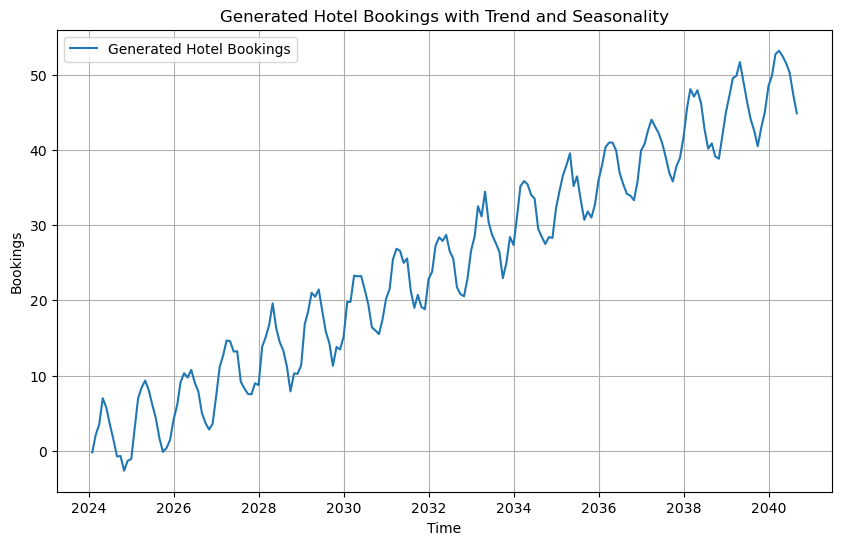

Time series data saved to 'vger_hotel_bookings.csv'.
Clean time series saved to vger_hotel_bookings_clean.csv
        Time  Bookings
0 2024-01-31        12
1 2024-02-29        15
2 2024-03-31        16
3 2024-04-30        20
4 2024-05-31        18
          Time  Bookings
195 2040-04-30        65
196 2040-05-31        64
197 2040-06-30        63
198 2040-07-31        60
199 2040-08-31        57
Min/Max: 10 66


In [4]:
# Generate raw series
df = generate_time_series(
    n_periods=200,         
    frequency="months",
    trend_slope=0.25,
    seasonal_period="monthly",
    seasonal_amplitude=5,
    noise_level=0.9
)

# Change so all values are positive
min_val = df["Bookings"].min()
df["Bookings"] = df["Bookings"] - min_val + 10

# Convert to integers (realistic booking counts)
df["Bookings"] = df["Bookings"].round().astype(int)

# Save clean version
df.to_csv("vger_hotel_bookings_clean.csv", index=False)
print("Clean time series saved to vger_hotel_bookings_clean.csv")
print(df.head())
print(df.tail())
print("Min/Max:", df["Bookings"].min(), df["Bookings"].max())


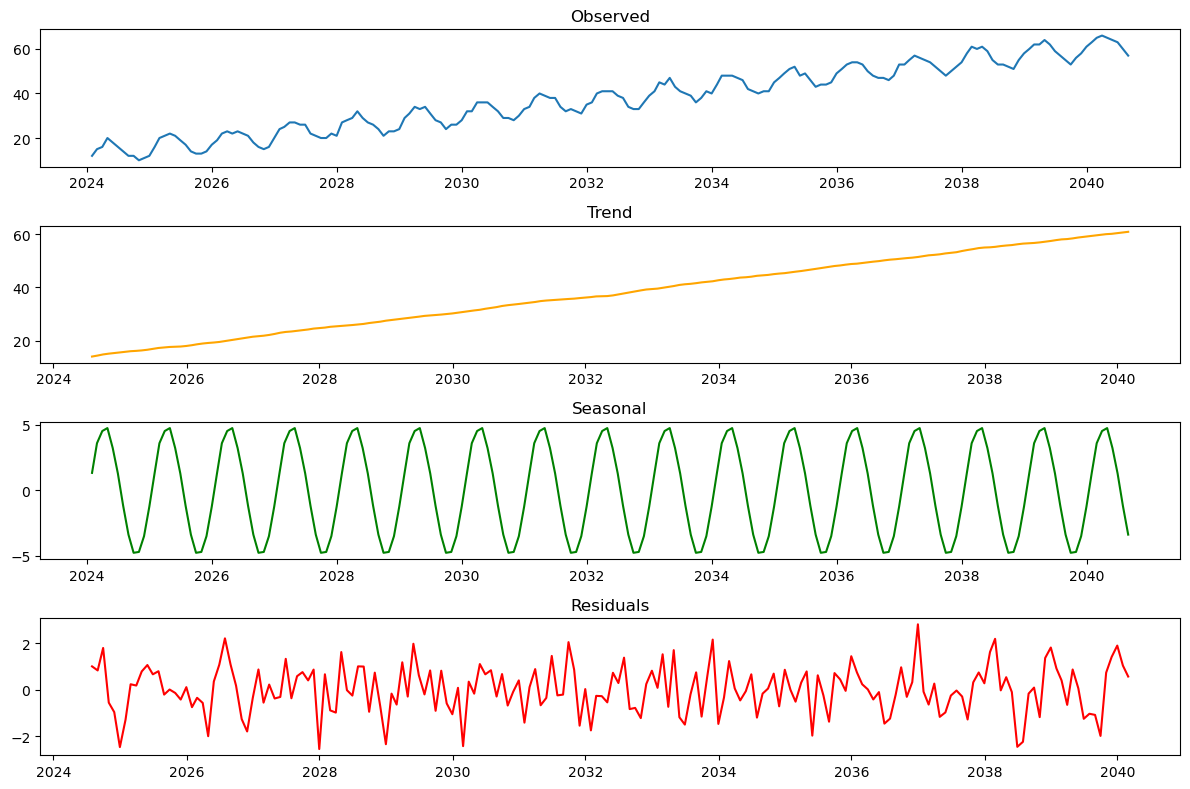

In [5]:
# Reload the cleaned hotel bookings file
df_analysis = pd.read_csv('vger_hotel_bookings_clean.csv')

# Run decomposition (Analysis Step)
decompose_time_series(df_analysis, frequency='M')
